In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("NLC_Physiochemical_Data.csv")
df.head()


,Batch,ThymeOil_mg,Sucrose_%,ParticleSize_nm,PDI,ZetaPotential_mV,EE_%,DL_%,Stability_7d,Stability_30d
0,A,5,1,145.2,0.22,-28.5,72.3,4.5,99.1,97.8
1,B,10,1,160.8,0.25,-29.8,78.6,4.8,98.7,96.9
2,C,15,2,175.4,0.30,-31.1,84.2,5.2,98.2,95.4
3,D,20,2,188.7,0.32,-33.4,89.8,5.7,97.9,94.6
4,E,25,3,205.6,0.35,-35.1,92.4,6.1,97.2,93.5


In [3]:
df.columns


Index(['Batch', 'ThymeOil_mg', 'Sucrose_%', 'ParticleSize_nm', 'PDI',
       'ZetaPotential_mV', 'EE_%', 'DL_%', 'Stability_7d', 'Stability_30d'],
      dtype='object')

In [4]:
df.describe()


,ThymeOil_mg,Sucrose_%,ParticleSize_nm,PDI,ZetaPotential_mV,EE_%,DL_%,Stability_7d,Stability_30d
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,15.000000,1.80000,175.140000,0.288000,-31.580000,83.460000,5.260000,98.220000,95.640000
std,7.905694,0.83666,23.525476,0.052631,2.673387,8.198049,0.650385,0.732803,1.730029
min,5.000000,1.00000,145.200000,0.220000,-35.100000,72.300000,4.500000,97.200000,93.500000
25%,10.000000,1.00000,160.800000,0.250000,-33.400000,78.600000,4.800000,97.900000,94.600000
50%,15.000000,2.00000,175.400000,0.300000,-31.100000,84.200000,5.200000,98.200000,95.400000
75%,20.000000,2.00000,188.700000,0.320000,-29.800000,89.800000,5.700000,98.700000,96.900000
max,25.000000,3.00000,205.600000,0.350000,-28.500000,92.400000,6.100000,99.100000,97.800000


In [5]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()


,ThymeOil_mg,Sucrose_%,ParticleSize_nm,PDI,ZetaPotential_mV,EE_%,DL_%,Stability_7d,Stability_30d
0,5,1,145.2,0.22,-28.5,72.3,4.5,99.1,97.8
1,10,1,160.8,0.25,-29.8,78.6,4.8,98.7,96.9
2,15,2,175.4,0.30,-31.1,84.2,5.2,98.2,95.4
3,20,2,188.7,0.32,-33.4,89.8,5.7,97.9,94.6
4,25,3,205.6,0.35,-35.1,92.4,6.1,97.2,93.5


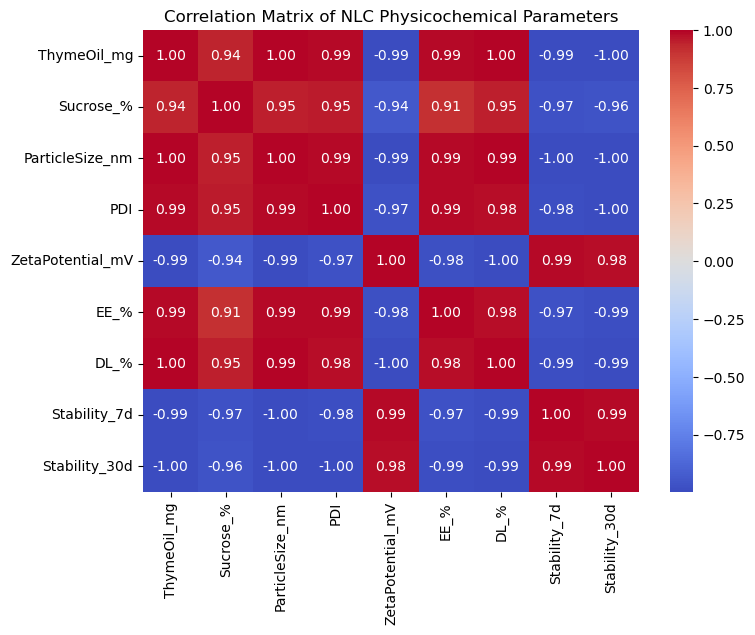

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of NLC Physicochemical Parameters")
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_data = StandardScaler().fit_transform(numeric_df)

pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(
    pca_scores,
    columns=["PC1", "PC2"]
)

pca_df.head()


,PC1,PC2
0,-4.071377,0.282788
1,-2.333185,-0.329452
2,0.170026,0.220175
3,1.950645,-0.466532
4,4.283890,0.293021


In [8]:
pca.explained_variance_ratio_


array([0.98234437, 0.01201108])

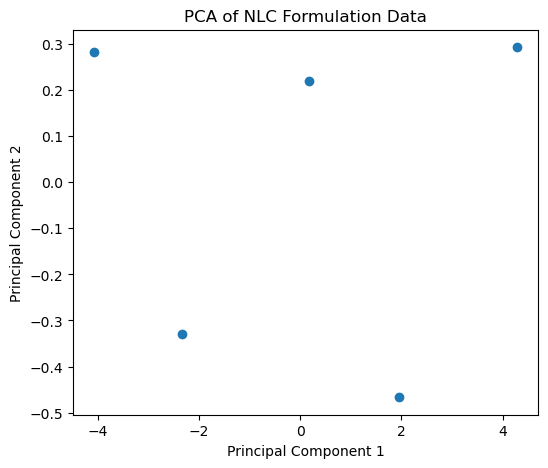

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of NLC Formulation Data")
plt.show()


In [10]:
X = numeric_df[["ParticleSize_nm", "PDI", "ZetaPotential_mV"]]
y = numeric_df["EE_%"]

model = LinearRegression()
model.fit(X, y)

model.score(X, y)


0.9845103402699351

## Conclusion
## Conclusion
This analysis demonstrates the application of exploratory data analysis,
correlation mapping, principal component analysis, and regression modelling
to nanostructured lipid carrier formulation data. Key physicochemical
parameters influencing encapsulation efficiency were identified,
highlighting the value of data-driven approaches in pharmaceutical
formulation development.

